In [1]:
#Load The Data
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
#Explore The Data
import seaborn as sns
import matplotlib.pyplot as plt

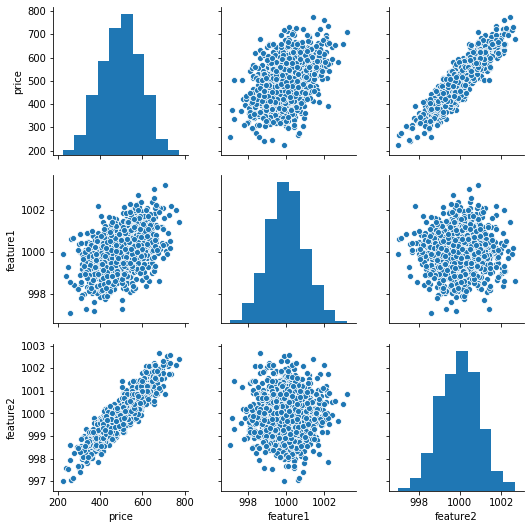

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


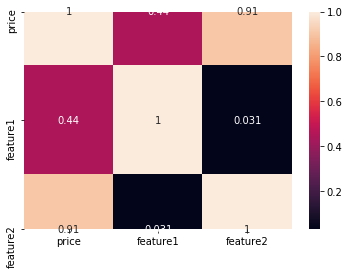

In [7]:
sns.heatmap(df.corr(),annot=True)

## Train/test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Normalizing/Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Creating the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [13]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))

In [16]:
# Final output node for prediction
model.add(Dense(1))

In [17]:
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

In [19]:
#Fitting the ANN to training Set
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256504.1696
Epoch 2/250
700/700 [==============================] - 0s 127us/sample - loss: 256361.5394
Epoch 3/250
700/700 [==============================] - 0s 117us/sample - loss: 256169.0255
Epoch 4/250
700/700 [==============================] - 0s 119us/sample - loss: 255926.6313
Epoch 5/250
700/700 [==============================] - 0s 116us/sample - loss: 255638.9473
Epoch 6/250
700/700 [==============================] - 0s 115us/sample - loss: 255297.4871
Epoch 7/250
700/700 [==============================] - 0s 114us/sample - loss: 254881.4694
Epoch 8/250
700/700 [==============================] - 0s 119us/sample - loss: 254366.1995
Epoch 9/250
700/700 [==============================] - 0s 112us/sample - loss: 253784.8202
Epoch 10/250
700/700 [==============================] - 0s 120us/sample - loss: 253147.8066
Epoch 11/250
700/700 [==============================] - 0s 124us/sampl

700/700 [==============================] - 0s 103us/sample - loss: 2695.0223
Epoch 91/250
700/700 [==============================] - 0s 123us/sample - loss: 2489.6974
Epoch 92/250
700/700 [==============================] - 0s 132us/sample - loss: 2309.6990
Epoch 93/250
700/700 [==============================] - 0s 136us/sample - loss: 2142.5649
Epoch 94/250
700/700 [==============================] - 0s 128us/sample - loss: 1986.2496
Epoch 95/250
700/700 [==============================] - 0s 98us/sample - loss: 1837.3105
Epoch 96/250
700/700 [==============================] - 0s 97us/sample - loss: 1691.0758
Epoch 97/250
700/700 [==============================] - 0s 111us/sample - loss: 1561.9965
Epoch 98/250
700/700 [==============================] - 0s 101us/sample - loss: 1442.3854
Epoch 99/250
700/700 [==============================] - 0s 100us/sample - loss: 1334.3512
Epoch 100/250
700/700 [==============================] - 0s 102us/sample - loss: 1233.0401
Epoch 101/250
700/700 [=

700/700 [==============================] - 0s 116us/sample - loss: 26.7560
Epoch 182/250
700/700 [==============================] - 0s 123us/sample - loss: 26.9214
Epoch 183/250
700/700 [==============================] - 0s 116us/sample - loss: 26.6677
Epoch 184/250
700/700 [==============================] - 0s 111us/sample - loss: 26.7434
Epoch 185/250
700/700 [==============================] - 0s 117us/sample - loss: 26.7517
Epoch 186/250
700/700 [==============================] - 0s 114us/sample - loss: 26.6303
Epoch 187/250
700/700 [==============================] - 0s 132us/sample - loss: 26.4426
Epoch 188/250
700/700 [==============================] - 0s 119us/sample - loss: 25.7633
Epoch 189/250
700/700 [==============================] - 0s 118us/sample - loss: 26.4932
Epoch 190/250
700/700 [==============================] - 0s 117us/sample - loss: 26.6940
Epoch 191/250
700/700 [==============================] - 0s 118us/sample - loss: 25.9307
Epoch 192/250
700/700 [============

## Evaluation

In [21]:
model.history.history

{'loss': [256504.16955357144,
  256361.539375,
  256169.0255357143,
  255926.63125,
  255638.94732142857,
  255297.4870535714,
  254881.469375,
  254366.19946428572,
  253784.82017857142,
  253147.80660714285,
  252419.52839285714,
  251610.24642857144,
  250698.491875,
  249693.216875,
  248556.00946428571,
  247316.778125,
  245968.15125,
  244470.25660714286,
  242854.39794642857,
  241097.2288392857,
  239216.29125,
  237140.84482142856,
  234881.7363392857,
  232431.40883928572,
  229757.53098214287,
  226776.0644642857,
  223409.3199107143,
  219834.85303571427,
  215935.23919642856,
  211862.45857142858,
  207440.68982142856,
  202764.428125,
  197812.966875,
  192658.13017857142,
  187228.07660714287,
  181601.04723214285,
  175526.89580357142,
  169254.5644642857,
  162796.46910714285,
  156066.36223214286,
  149213.76410714287,
  142133.93714285715,
  134889.6127232143,
  127498.85165178572,
  120059.69419642857,
  112597.41254464285,
  105107.70058035714,
  97643.6584375,
  

In [22]:
loss_df = pd.DataFrame(model.history.history)

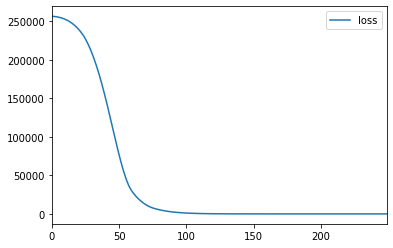

In [23]:
loss_df.plot()

In [24]:
model.metrics_names

['loss']

In [25]:
model.evaluate(X_train,y_train)

700/700 [==============================] - 0s 419us/sample - loss: 25.4398


25.439813537597658

In [26]:
model.evaluate(X_test,y_test,verbose=0)

30.95572270711263

In [27]:
test_predictions = model.predict(X_test)

In [28]:
test_predictions

array([[406.61426],
       [625.32166],
       [593.76385],
       [574.09283],
       [368.22763],
       [580.92316],
       [516.96466],
       [460.40085],
       [551.05707],
       [448.75958],
       [613.53424],
       [550.20734],
       [420.48135],
       [410.28775],
       [652.69916],
       [438.5876 ],
       [509.68918],
       [662.10425],
       [664.58234],
       [567.05176],
       [335.59213],
       [446.26416],
       [383.9426 ],
       [380.0077 ],
       [568.2839 ],
       [612.5399 ],
       [534.03656],
       [429.1977 ],
       [657.51105],
       [415.28076],
       [443.89777],
       [486.6187 ],
       [439.78113],
       [683.91974],
       [425.8836 ],
       [419.1924 ],
       [503.06226],
       [552.0744 ],
       [511.56055],
       [397.01025],
       [620.28253],
       [417.86978],
       [606.1246 ],
       [447.10986],
       [503.52365],
       [583.0108 ],
       [670.5837 ],
       [491.7631 ],
       [319.55536],
       [486.9553 ],


In [29]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [30]:
test_predictions

0      406.614258
1      625.321655
2      593.763855
3      574.092834
4      368.227631
          ...    
295    530.792969
296    517.486755
297    611.362915
298    418.131226
299    412.352844
Length: 300, dtype: float32

In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [32]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [33]:
pred_df.columns = ['Test True Y','Model Prediction']

In [34]:
pred_df

,Test True Y,Model Prediction
0,402.296319,406.614258
1,624.156198,625.321655
2,582.455066,593.763855
3,578.588606,574.092834
4,371.224104,368.227631
...,...,...
295,525.704657,530.792969
296,502.909473,517.486755
297,612.727910,611.362915
298,417.569725,418.131226


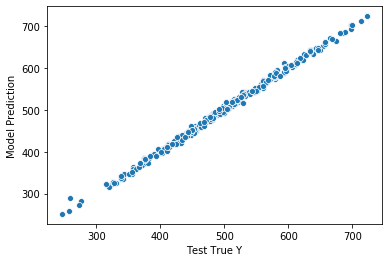

In [37]:
sns.scatterplot(x='Test True Y',y='Model Prediction',data=pred_df)

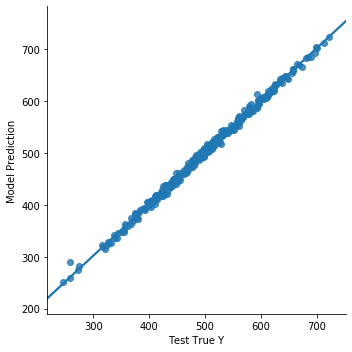

In [38]:
sns.lmplot(x='Test True Y',y='Model Prediction',data=pred_df)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Prediction'])

4.384874388301814

In [41]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Prediction'])

30.95572535596882

 # Predicting on brand new data

In [58]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [59]:
new_gem = sc_X.fit_transform(new_gem)

In [60]:
model.predict(new_gem)

array([[499.14453]], dtype=float32)

## Saving and Loading a Model

In [61]:
from tensorflow.keras.models import load_model

In [65]:
model.save('my_gem_model.h5')  # creates a HDF5 file 'my_model.h5'

In [66]:
later_model = load_model('my_model.h5')

In [67]:
later_model.predict(new_gem)

array([[499.14453]], dtype=float32)